# Banana Quality Classification  

## Introduction  
This project applies supervised machine learning to predict **banana quality** (good vs. bad) based on physical and chemical attributes such as size, weight, sweetness, softness, ripeness, and acidity.  

The workflow includes:  
- Exploratory Data Analysis (EDA) to understand feature distributions and correlations  
- Feature selection and cleaning to remove non-informative variables  
- Data preprocessing with scaling and train/validation splitting  
- Model training and evaluation using classifiers such as Support Vector Machines (SVC), Logistic Regression, K-Nearest Neighbors (KNN), and Random Forest  
- Hyperparameter tuning and performance comparison across models  

## Assignment Description
In a world on the brink of chaos, an all-powerful organization known as The Banana Syndicate is poised to take control of the global market. Their strategy is devious: they seek to manipulate the supply of bananas, using them as a key to dominate the world's economies. The Syndicate has developed a complex algorithm, capable of sorting bananas based on several critical traits — Size, Weight, Sweetness, Softness, HarvestTime, Ripeness, Acidity. Only the good bananas, those that meet their secret specifications, can fuel their rise to power. The bad bananas, however, stand in the way, threatening their entire operation.

As a top agent in the resistance, your mission is clear. You must use machine learning to develop a powerful system that can distinguish between the perfect, ripe bananas the Syndicate seeks to control, and the overripe, bruised, or sour bananas that could expose their plot.

Your task is to create a classifier that uses the following traits to sort the bananas into the right categories. 

As the world watches, the fate of global commerce depends on your ability to train a model that can tell good bananas from bad. Will you rise to the challenge and foil the Syndicate’s evil plot, or will the global banana empire fall under their control? The power to change the world — and the bananas — lies in your hands.



## Imports

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Reading Data

In [165]:
# Read data
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [166]:
# Split into features and target
X = df_train.drop(columns = ["Quality"])
y = df_train["Quality"]

## Data Exploration and Visualization

In [167]:
# Basic Information about the datasets
print("Train shape:", df_train.shape)
print("Test shape:", df_test.shape)

Train shape: (2800, 10)
Test shape: (1200, 9)


In [168]:
# Datatypes and missing values in training data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Size            2800 non-null   float64
 1   Weight          2800 non-null   float64
 2   Sweetness       2800 non-null   float64
 3   Softness        2800 non-null   float64
 4   HarvestTime     2800 non-null   float64
 5   Ripeness        2800 non-null   float64
 6   Acidity         2800 non-null   float64
 7   Peel Thickness  2800 non-null   float64
 8   Banana Density  2800 non-null   float64
 9   Quality         2800 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 218.9 KB


The training data consists of 2800 samples, and 10 columns whereas 9 are features and 1 is target (Quality).

Note that the Peel Thickness and Banana Density is not listed in the description of the categories. We'll have to explore their relevance further on. 

In [169]:
# Basic information of data
df_train.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Peel Thickness,Banana Density,Quality
0,-1.825734,-0.883754,-2.423530,-1.198136,-4.286523,1.585792,-0.589002,0.164434,65822.758426,0
1,-0.142286,-0.708374,-2.224219,2.222650,1.896814,-4.284821,1.069387,0.704945,99930.329162,0
2,-1.957254,-4.293733,-1.073703,-1.405019,-0.729812,3.930497,-0.397840,0.852810,37081.567982,0
3,-2.168043,3.095472,1.707717,-0.584218,-0.564767,0.014740,-0.103799,0.582909,63931.435551,1
4,-3.149338,3.058402,2.173671,-0.265609,-2.563220,0.376015,1.434252,0.102162,48711.448819,1


In [170]:
# Statistic summary
df_train.describe()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Peel Thickness,Banana Density,Quality
count,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000
mean,-0.764652,-0.751050,-0.751005,-0.019557,-0.700683,0.771011,-0.000989,0.506758,49397.491271,0.506429
std,2.114313,2.006590,1.955109,2.076865,2.029916,2.098275,2.286725,0.291936,29327.077623,0.500048
min,-7.998074,-7.103426,-6.434022,-6.959320,-7.570008,-7.423155,-8.226977,0.000086,-980.343999,0.000000
25%,-2.249285,-2.238843,-2.104742,-1.593816,-2.112747,-0.572589,-1.608385,0.257860,24025.427350,0.000000
50%,-0.922448,-0.882387,-0.997902,0.220174,-0.856858,0.930927,0.073963,0.506282,49303.534616,1.000000
75%,0.638570,0.853566,0.334989,1.542899,0.628895,2.229410,1.662417,0.761016,75066.598785,1.000000
max,5.806328,5.679692,6.438196,8.241555,5.942060,7.077372,6.395850,0.999430,99982.761410,1.000000


- Most of the features are centered around zero, with an std around 2. 
- Ripeness and Acidity shows wide value ranges, from approx. -7.4 to 7.1 and -8.2 to 6.4. 
- The Banana Density has the largest values, as well as some negative values. 

### Histograms

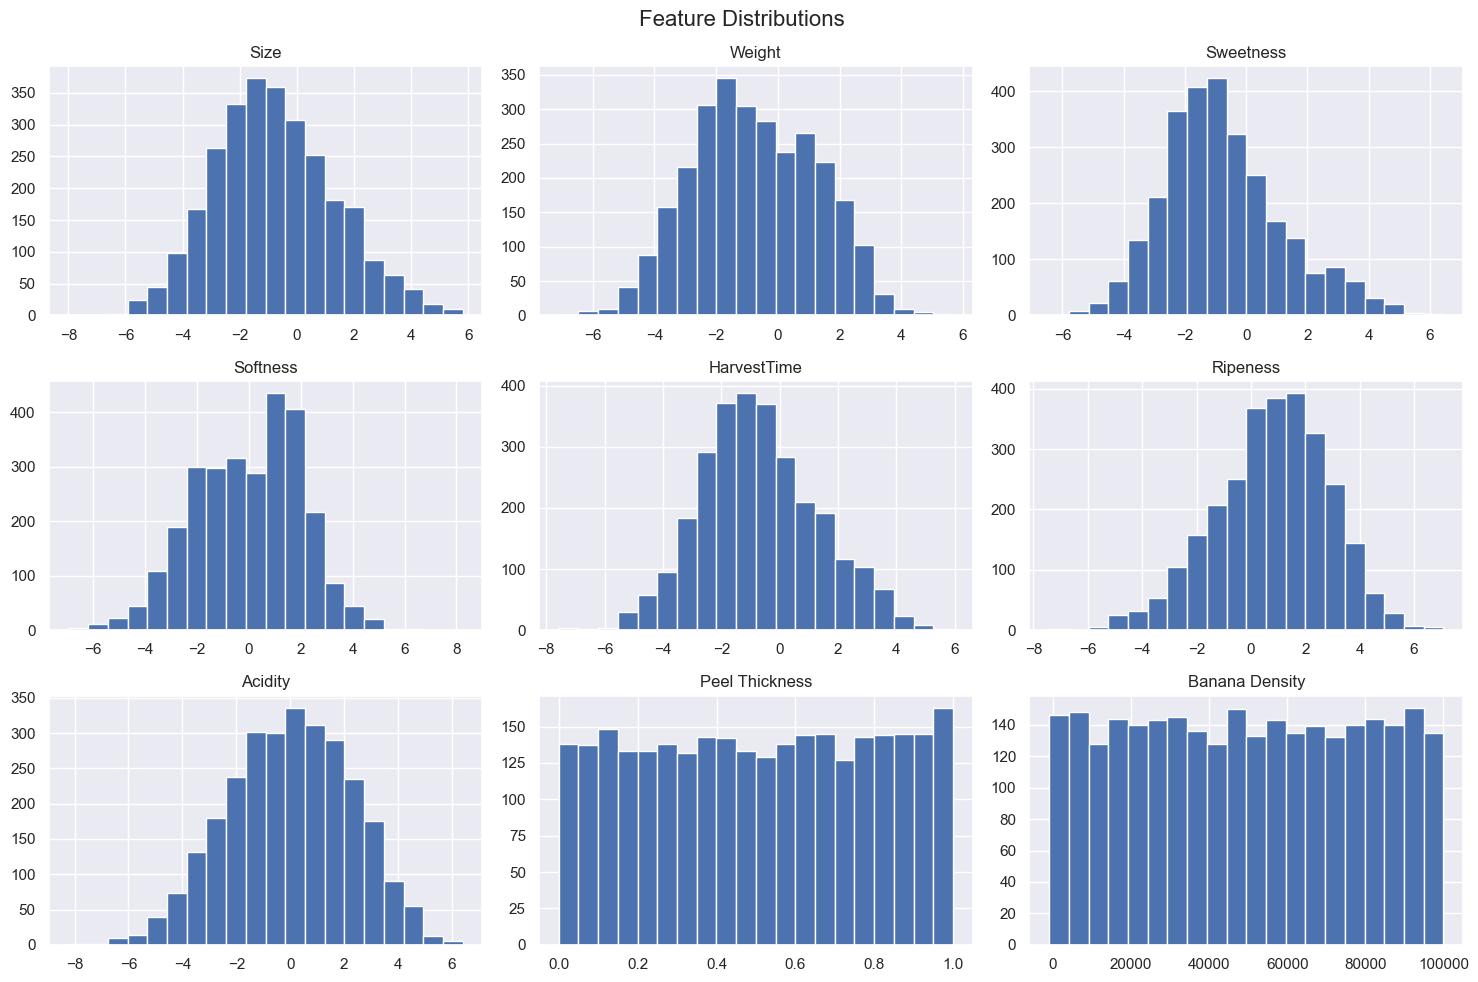

In [171]:
# Some aesthetics for the plots
plt.style.use("default")
sns.set(font_scale=1.0)

# Basic Histogram of the Feature distributions
X.hist(figsize=(15, 10), bins = 20)
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

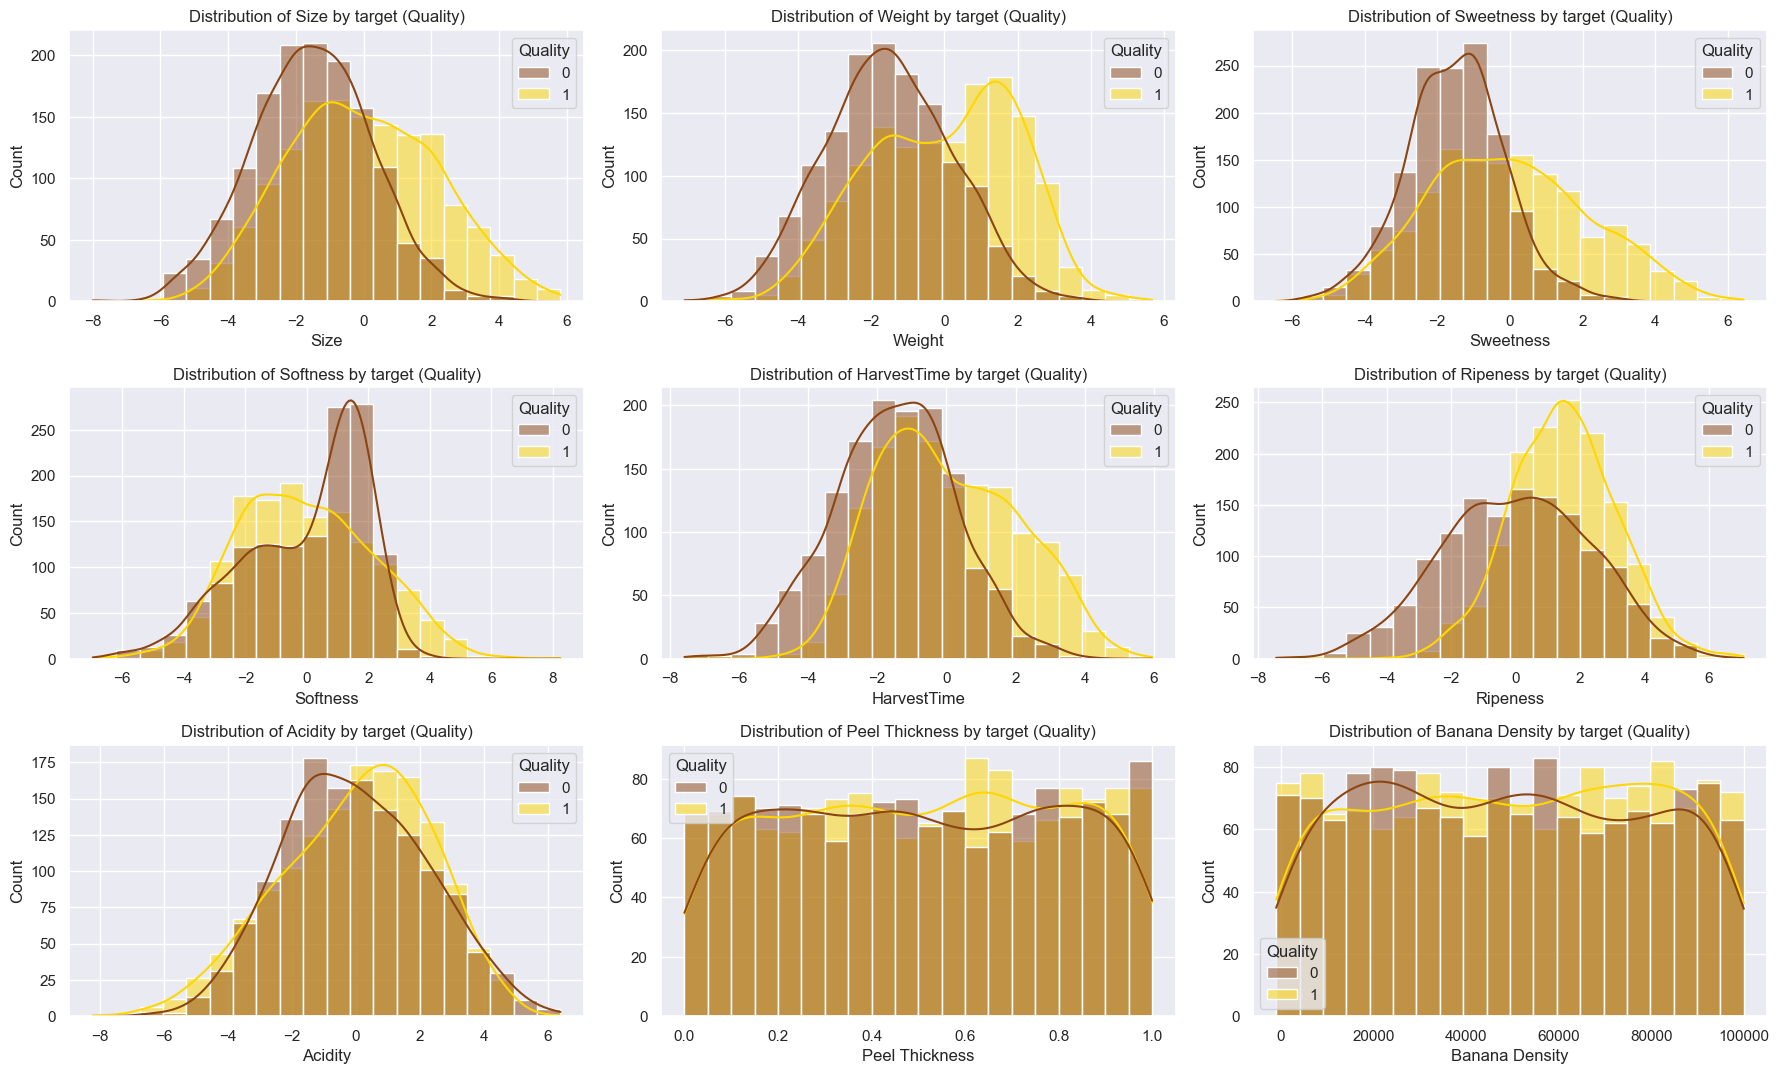

In [172]:
# Histogram per feature, colored by Quality
plt.figure(figsize=(18,14))
for i, col in enumerate(X):
    plt.subplot(4, 3, i + 1)
    sns.histplot(data = df_train, x=col, hue = "Quality", 
                 kde = True, bins = 20, palette={0: "saddlebrown", 1: "gold"})
    plt.title(f"Distribution of {col} by target (Quality)")
plt.tight_layout()
plt.show()


There is differences in the bad and good bananas, but in different degrees based on the features. 

- Sweetness shows a clear separation between the good and bad bananas, whereas good bananas are significantly sweeter than the bad ones. 
- Weight shows that good bananas are generally heavier than the bad ones
- HarvestTime: good bananas tend to be harvested slightly later than the bad ones
- Ripeness are higher for the good bananas, as one might desire bananas that has properly ripeness

### Heatmaps

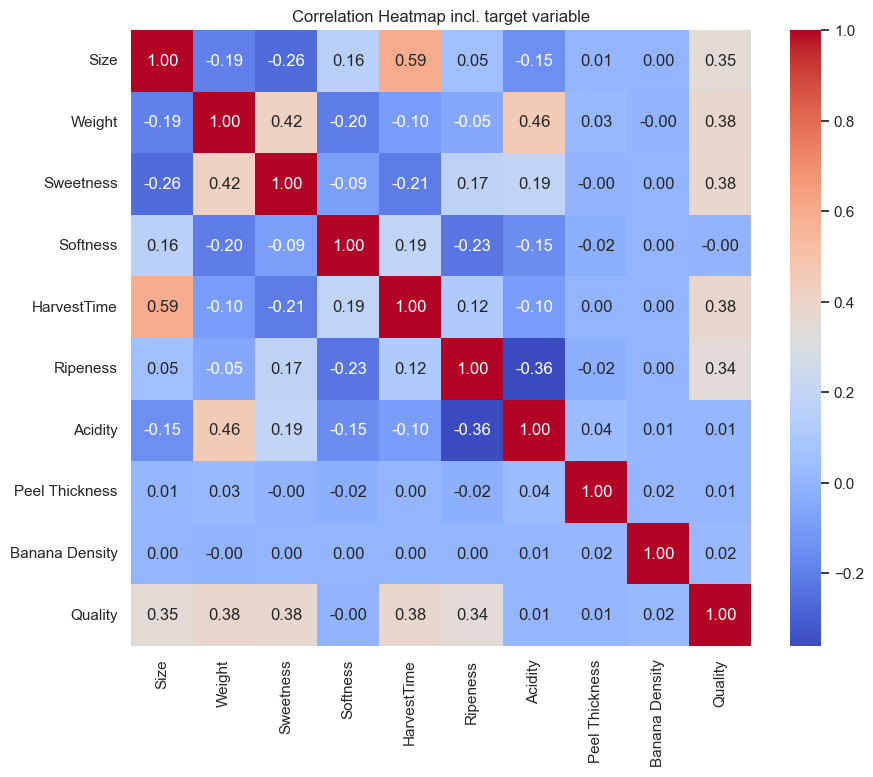

In [173]:
# Heatmap for all features incl. target variable
plt.figure(figsize=(10, 8))
sns.heatmap(df_train.corr(), annot = True, cmap = "coolwarm", fmt=".2f")
plt.title("Correlation Heatmap incl. target variable")
plt.show()

Based on this heatmap, both Peel Thickness and Banana Density show zero or near-zero correlation with all other features, as well as the target. This indicates that these may not contribute with meaningful information to the models, and it could be useful to remove these. 

Weight, Sweetness and HarvestTime are the features correlating the most with Quality, with 0.38. While Size and Ripeness also correlates, but a little bit weaker. This could indicate that these features could provide valuable information in regards of identifying banana quality. 

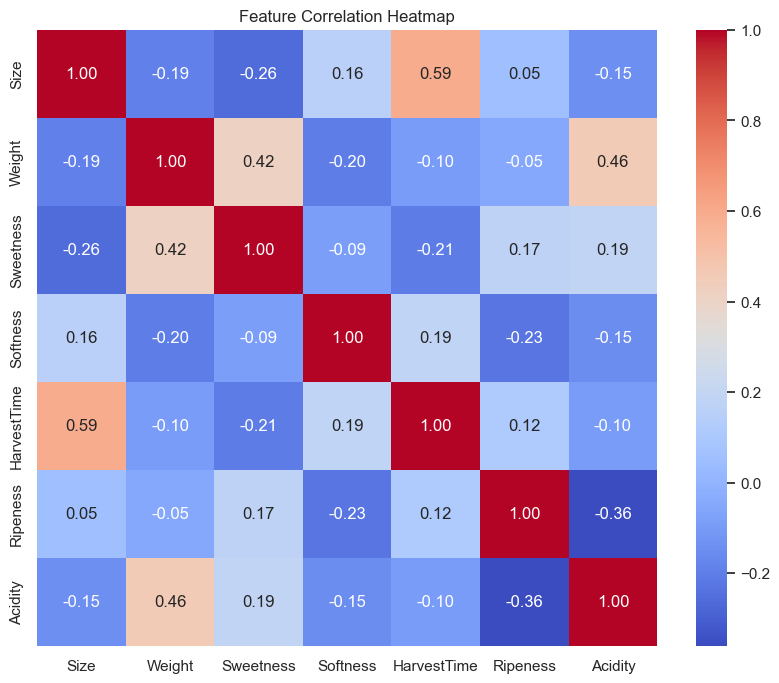

In [174]:
# Heatmap without Peel thickness, Banana Density and Quality
# Filtering out features and the target variable
filtered_cols = df_train.drop(columns = ["Peel Thickness", "Banana Density", "Quality"])

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


To get a more nuanced view of the relationship between the features, we've also constructed this heatmap excluding the features with zero/near-zero correlation as well as the target variable. 

As one can see, there is a high correlation of 0.59 for Size and HarvestTime, which could indicate that these features could be overlapping information in the features. 

Sweetness and weight also has a high somewhat high correlation, or 0.42, as well as the Acidity and Weight of 0.46. 

Even though we state that its "high", its actually more of a moderate correlation - at least for Sweetness, weight and Acidity. 

### Countplot

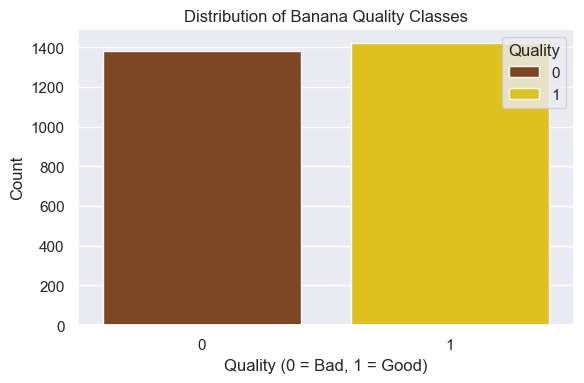

In [175]:
# Countplot of bad vs. good bananas
plt.figure(figsize= (6, 4))
sns.countplot(data = df_train, x = "Quality", hue= "Quality", palette={0: "saddlebrown", 1: "gold"})    # Customizing the colors to indicate good bananas (yellow) and bad bananas (brown)
plt.title("Distribution of Banana Quality Classes")
plt.xlabel("Quality (0 = Bad, 1 = Good)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

The dataset is quite balanced in terms of good and bad bananas, with a little bit more good bananas than bad ones. 

### Boxplots

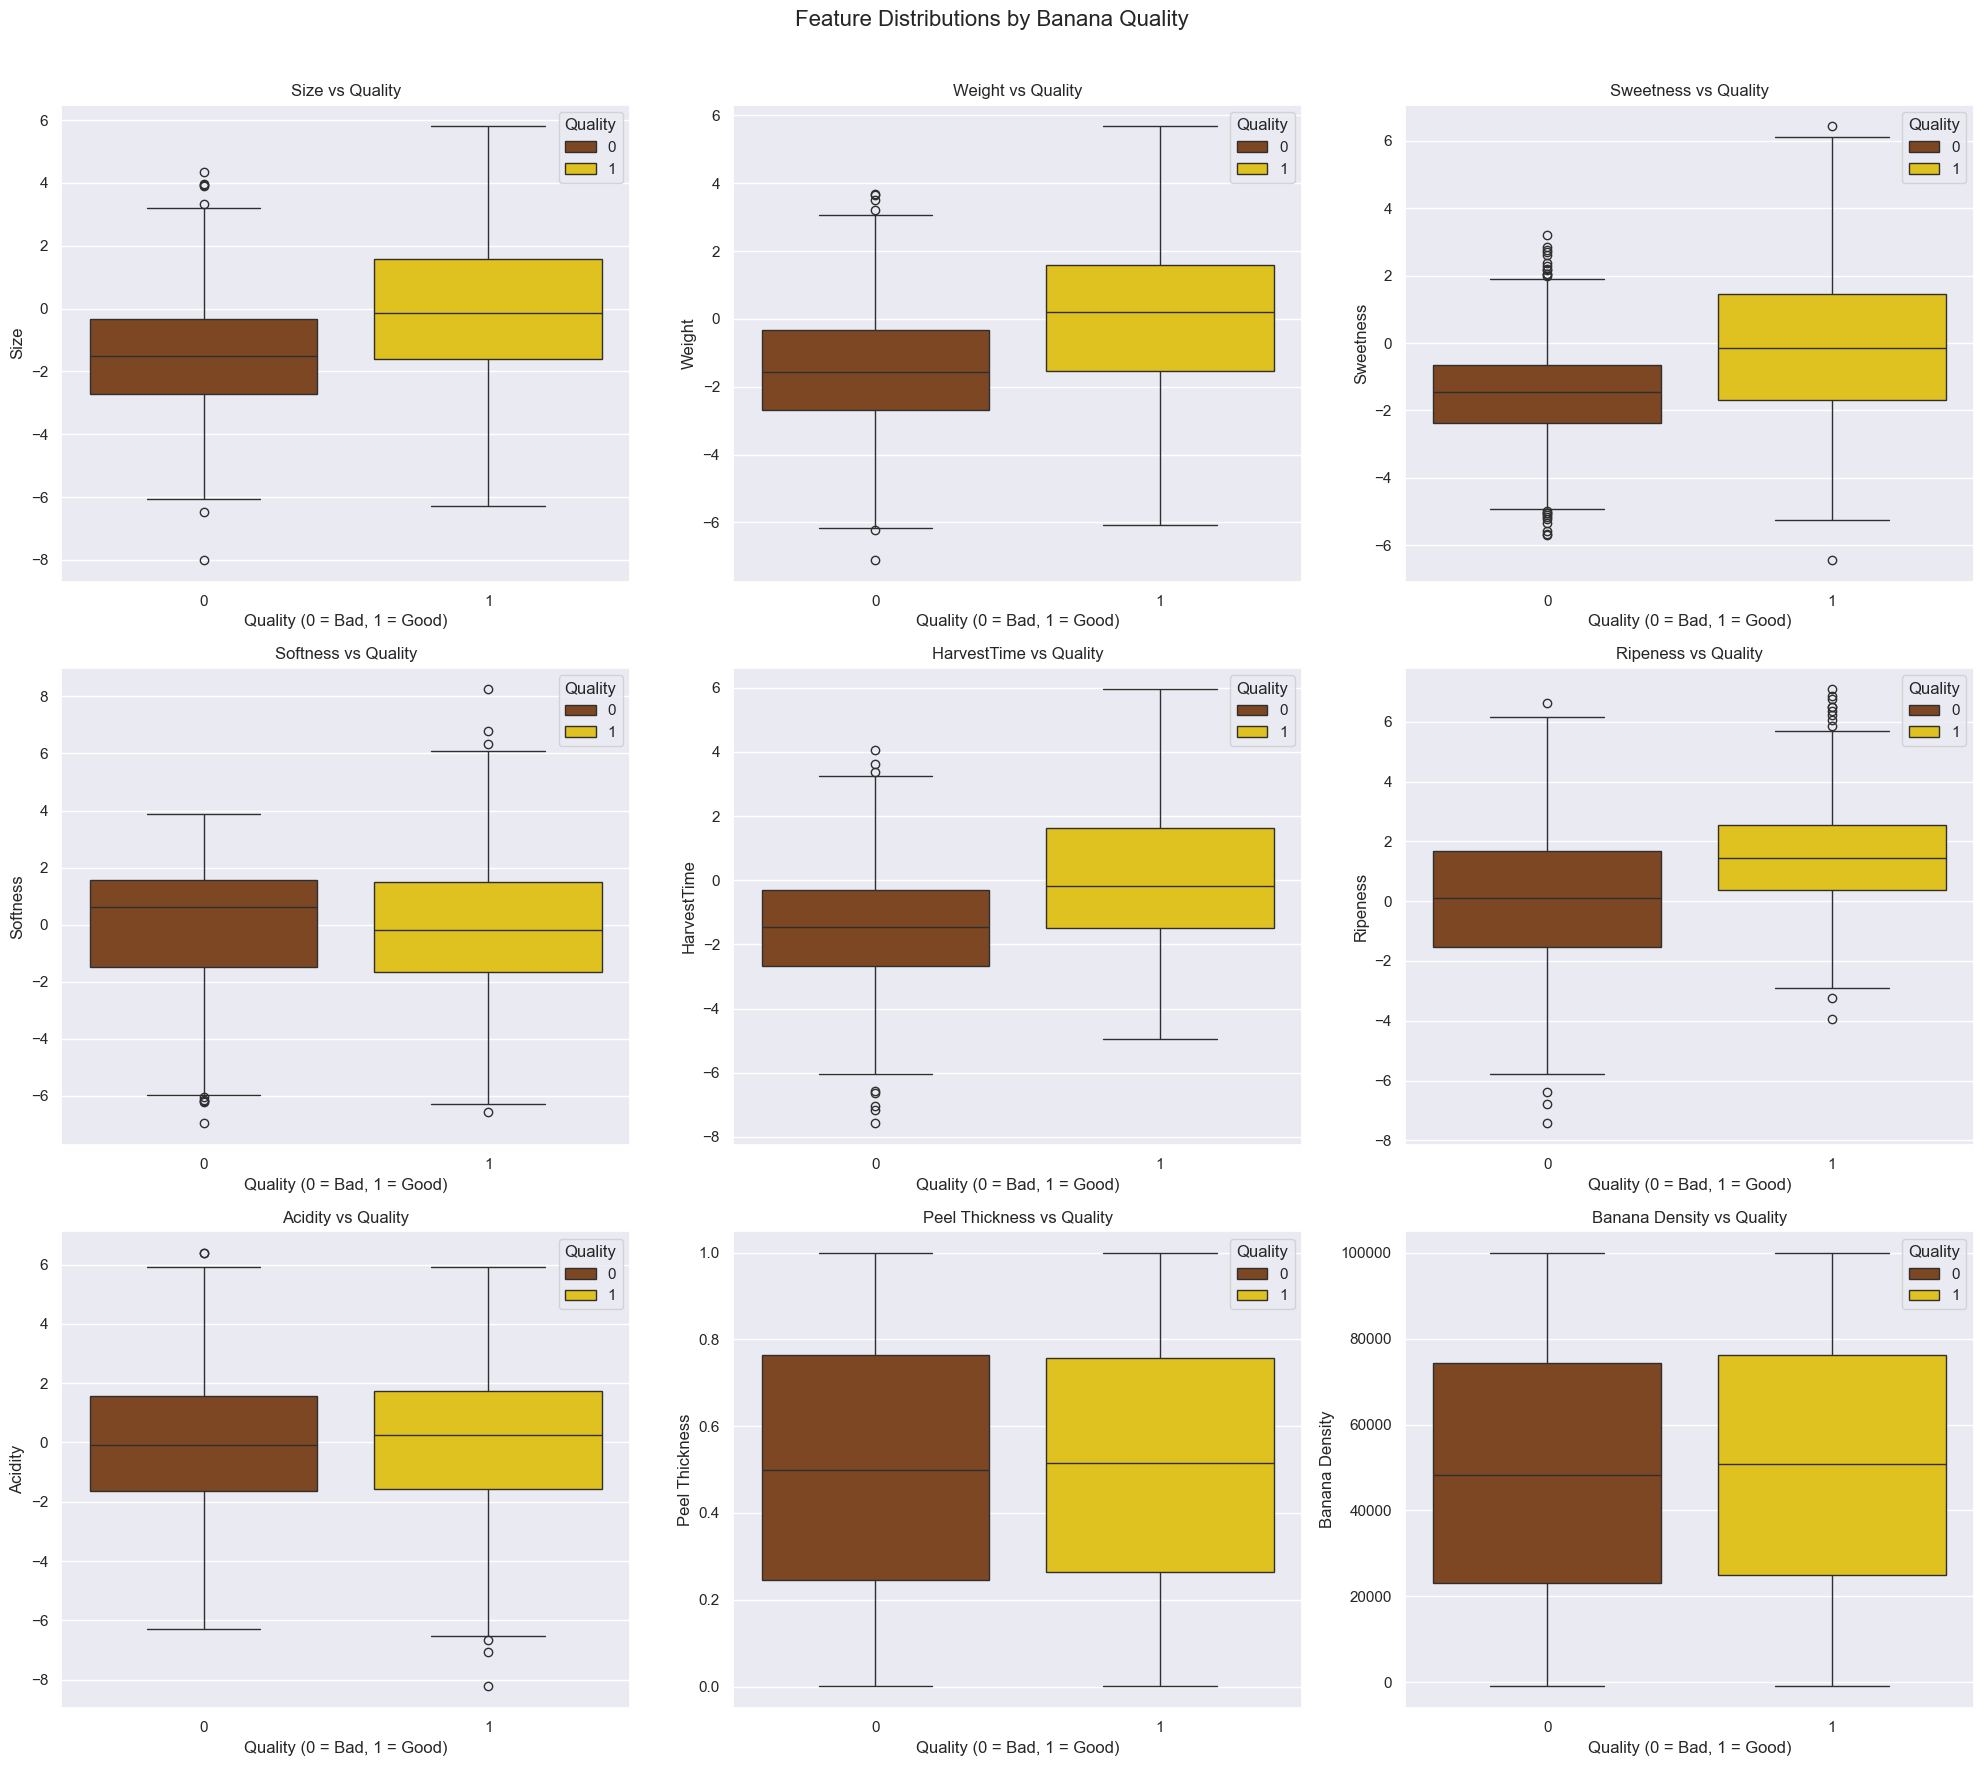

In [176]:
# Boxplots per feature by quality
plt.figure(figsize=(20, 18))
for idx, feature in enumerate(X):
    plt.subplot(3, 3, idx + 1)
    sns.boxplot(data=df_train, x="Quality", y=feature, hue = "Quality", palette={0: "saddlebrown", 1: "gold"})
    plt.title(f"{feature} vs Quality")
    plt.xlabel("Quality (0 = Bad, 1 = Good)")
    plt.ylabel(feature)

plt.suptitle("Feature Distributions by Banana Quality", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


These boxplots provides information about how each feature is distributed for good and bad bananas. 
1. Size vs. Quality: good bananas are slightly larger than the bad ones on average, with some overlap.
2. Weight vs. Quality: the good bananas has a higher median and upper quartile than the bad ones
3. Sweetness vs. Quality: good bananas has a higher median sweetness than bad ones, and there is not that big of an overlap between the classes. There is also a lot of outliers on the "bad"-class. 
4. Softness vs. Quality: quite overlapping boxes and similar median across the classes
5. HarvestTime vs. Quality: positive shift in the median of the good bananas - these are harvested a bit later than the bad ones. Distinct separation. 
6. Ripeness vs. Quality: higher median for the good bananas. Outliers in both of the classes
7. Acidity vs. Quality: slightly higher median for the good bananas, but considerable overlap of classes.
8. Peel Thickness and Banana Density vs. Quality: no big distinction between the classes in either boxplots - nearly same median and interquartile in classes. 

Several features contains visible outliers, especially for the bad banana class (e.g. sweetness, ripeness, softness). Ripeness also shows more outliers in the good bananas-class than the others. The boxplot also support the earlier findings about the Peel Thickness and Banana Desnity features. 


### Violinplot

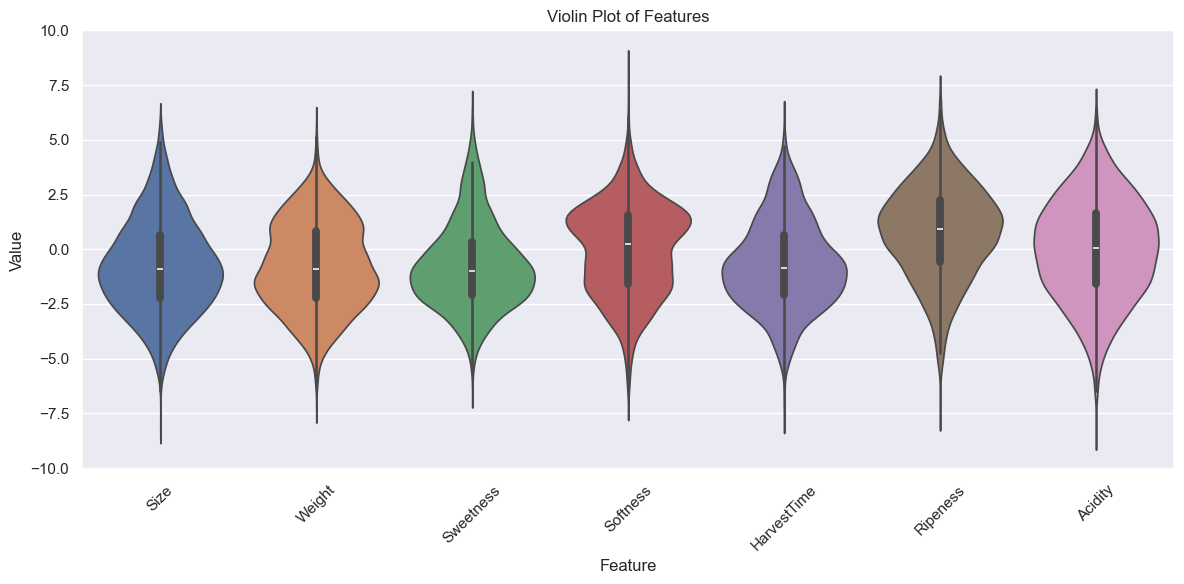

In [177]:
# Violinplot for distribution and variations of all features
# Melt the X dataframe to a long format suitable for seaborn
df_melted = X.drop(columns=["Peel Thickness", "Banana Density"]).melt(var_name="Feature", value_name="Value")

plt.figure(figsize=(12, 6))
sns.violinplot(x="Feature", y="Value", data=df_melted, hue = "Feature")
plt.xticks(rotation=45)
plt.title("Violin Plot of Features")
plt.tight_layout()
plt.show()

The violinplots shows the distribution of each feature in the dataset, providing both a overview of the central tendencies and spread. 

We can observe that most of the features has a relative symmetrical distribution. Softness and Ripeness has some higher density in the upper values, which could indicate that some bananas have very ripe or soft textures - which is two features one could assume is highly related to the quality of the banana. Sweetness and HarvestTime appear more consistent, indicating thate these might vary less in the dataset.


### Pairplot

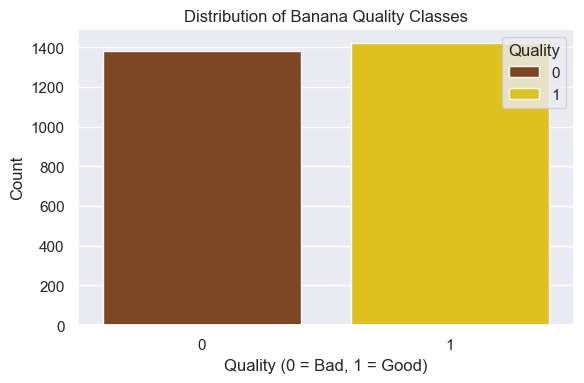

In [178]:
plt.figure(figsize= (6, 4))
sns.countplot(data = df_train, x = "Quality", hue= "Quality", palette={0: "saddlebrown", 1: "gold"})    # Customizing the colors to indicate good bananas (yellow) and bad bananas (brown)
plt.title("Distribution of Banana Quality Classes")
plt.xlabel("Quality (0 = Bad, 1 = Good)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

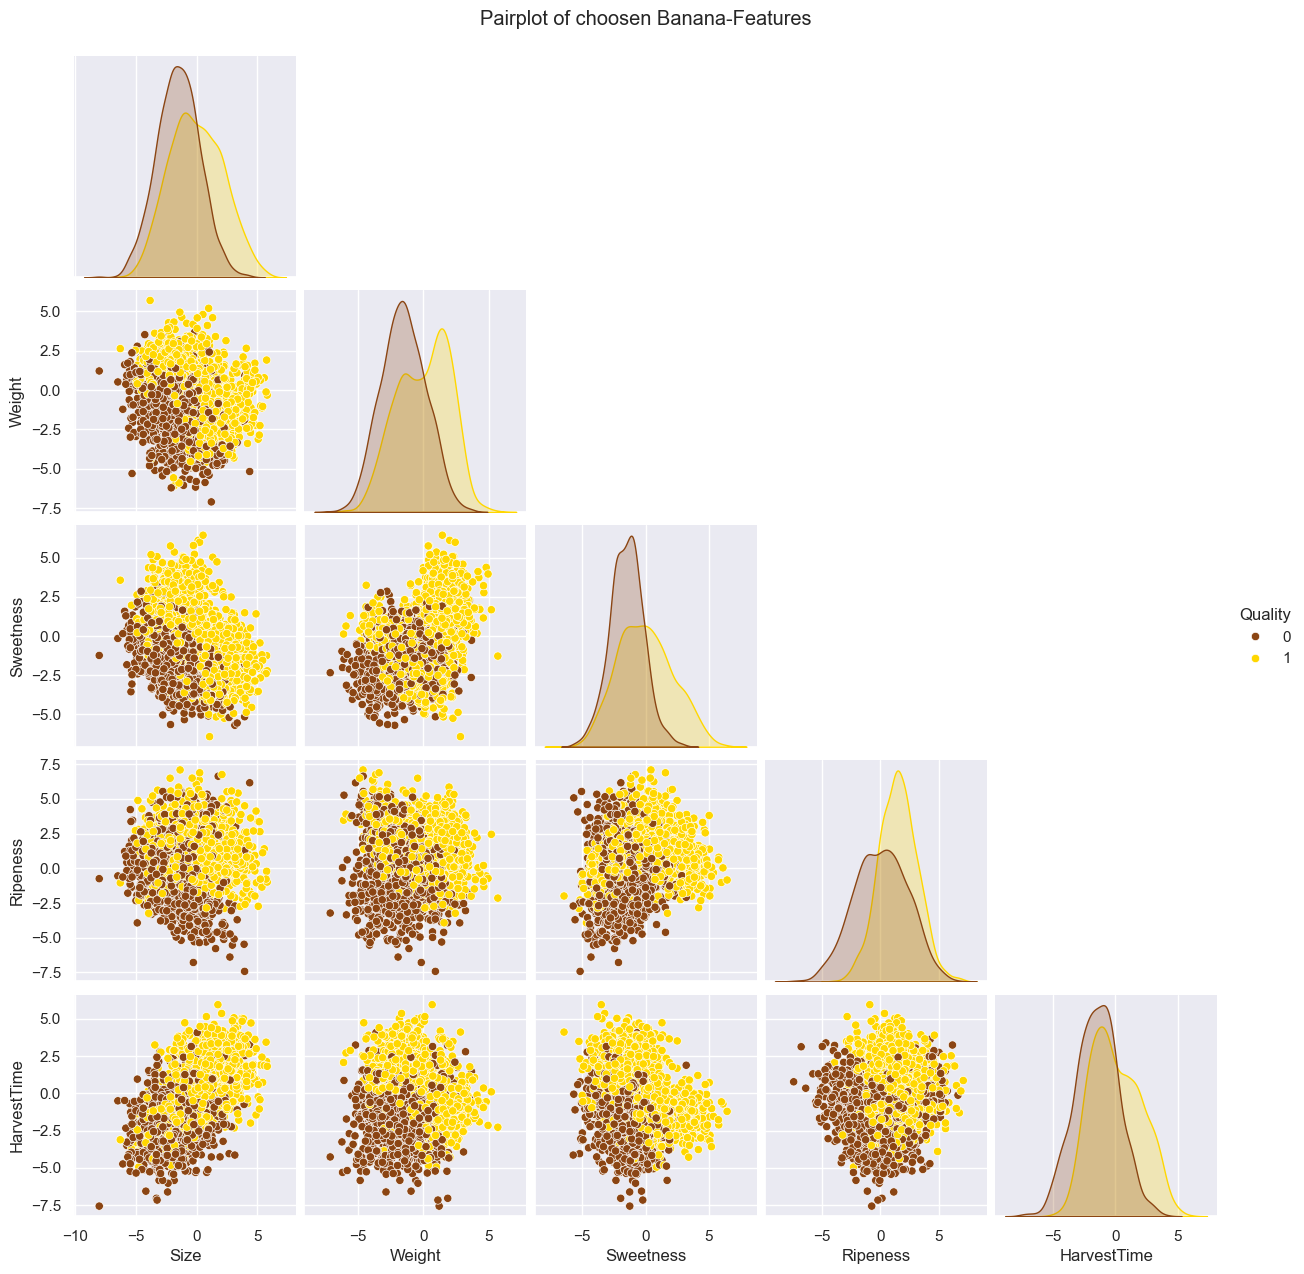

In [179]:
# Pairplot of selected features
selected_features = ['Size', 'Weight', 'Sweetness', 'Ripeness', 'HarvestTime', 'Quality']

sns.pairplot(df_train[selected_features], hue="Quality", palette={0: "saddlebrown", 1: "gold"}, corner=True)
plt.suptitle("Pairplot of choosen Banana-Features", y=1.02)
plt.show()

We chose to make a pairplot of the features that showed the highest correlation with Quality in the heatmaps. The goals is to identify eventual non-linear patterns, groupings or separations between the good an bad bananas. 

There is a clear distinction between the good and bad bananas, whereas good (yellow) bananas tend to cluster in areas with higher size, weight, sweetness and ripeness, which could indicate that these traits are strong predictors of quality. There is also a visible separation between the two classes in several feature combinations. 
There is a less visible separation in the HarvestTime and size. 




## Data Cleaning

### Missing Values

In [180]:
# We could see in the initial exploration that there were no missing values, but lets double check
df_train.isnull().sum()

Size              0
Weight            0
Sweetness         0
Softness          0
HarvestTime       0
Ripeness          0
Acidity           0
Peel Thickness    0
Banana Density    0
Quality           0
dtype: int64

There is no missing values in the training data.

## Data Preprocessing and Visualization

### Feature Selection

As the initial exploration and visualizations indicated, there is some features that might have less predicitve value for the further modelling. We've therefore chosen to remove some of these.

Peel Thickness and Banana is not stated in the list of features in the assignment text, and they also show zero to near-zero correlation with quality and the other features. From the visualisations and such, they don't seem to provide any information for the further process.

In [181]:
feature_cleaning = ["Size", "Weight", "Sweetness", "Softness", "HarvestTime", "Ripeness", "Acidity"]   # Dropping the Peel Thickness, Banana Density

# Updating the X dataframe
X = X[feature_cleaning]

# no changes to y, so no need to update

In [182]:
X.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity
0,-1.825734,-0.883754,-2.423530,-1.198136,-4.286523,1.585792,-0.589002
1,-0.142286,-0.708374,-2.224219,2.222650,1.896814,-4.284821,1.069387
2,-1.957254,-4.293733,-1.073703,-1.405019,-0.729812,3.930497,-0.397840
3,-2.168043,3.095472,1.707717,-0.584218,-0.564767,0.014740,-0.103799
4,-3.149338,3.058402,2.173671,-0.265609,-2.563220,0.376015,1.434252


### Split in training and validationset

In [183]:
# Split the data into training and validation set for end-evaluation, not for the hyperparameter testing
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.4, random_state=42
)

### Scale with StandardScaler

In [184]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns
)
X_val_scaled = pd.DataFrame(
    scaler.transform(X_val),
    columns=X_train.columns
)

## Modelling

### SVC

In [185]:
# Choosing C-values to test 
C_values = [0.01, 0.1, 1, 10, 100]
svc_results = []

for C in C_values:
    accuracies = []
    for seed in range(10):
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=seed)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)

        model = SVC(kernel="rbf", C=C)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_val_scaled)
        acc = accuracy_score(y_val, y_pred)
        accuracies.append(acc)

    avg_acc = np.mean(accuracies)
    svc_results.append((C, avg_acc))

# Resultat som DataFrame
svc_results_df = pd.DataFrame(svc_results, columns=["C", "Avg Accuracy"])
print(svc_results_df.sort_values(by="Avg Accuracy", ascending=False))

        C  Avg Accuracy
3   10.00      0.978929
2    1.00      0.976964
4  100.00      0.972500
1    0.10      0.966071
0    0.01      0.944107


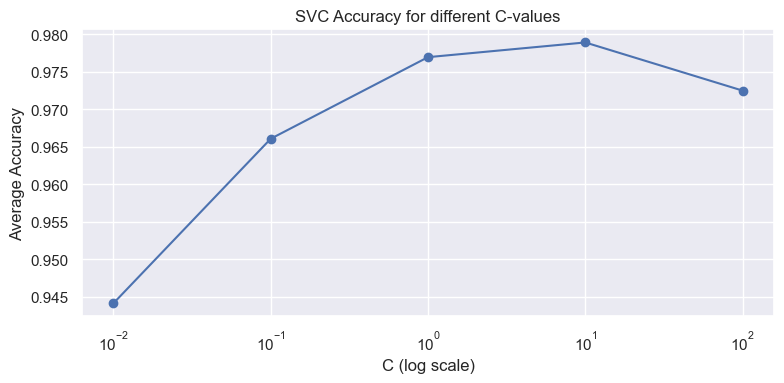

In [186]:
# Visualizing 
plt.figure(figsize=(8, 4))
plt.plot(svc_results_df["C"], svc_results_df["Avg Accuracy"], marker="o")
plt.xscale("log")
plt.xlabel("C (log scale)")
plt.ylabel("Average Accuracy")
plt.title("SVC Accuracy for different C-values")
plt.grid(True)
plt.tight_layout()
plt.show()

After testing 5 different C-values for SVC with an RBF kernel, evaluated over 10 different train test splits, the results shows that C=10 gives the highest average accuracy of approx. 97,89%. Too low C can lead to underfitting, while a too high C may lead to overfitting.

### Logistic Regression

In [187]:
C_values = [0.01, 0.1, 1, 10, 100]
logreg_results = []

for C in C_values:
    accs = []
    for seed in range(10):
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=seed)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)

        model = LogisticRegression(C=C, max_iter=1000)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_val_scaled)
        accs.append(accuracy_score(y_val, y_pred))
    
    avg_acc = np.mean(accs)
    logreg_results.append((C, avg_acc))

# Resultat
logreg_df = pd.DataFrame(logreg_results, columns=["C", "Avg Accuracy"])
print(logreg_df.sort_values(by="Avg Accuracy", ascending=False))

        C  Avg Accuracy
0    0.01      0.876429
1    0.10      0.872500
3   10.00      0.872500
4  100.00      0.872500
2    1.00      0.872321


We tested the same C-values as we did with the SVC-model. There were done 10 train test splits, with different random_state. The results indicates that C= 0.01 gives the highest average accuracy of approx. 87,6%, which is the weakest accuracy compared to the other models we've run. 

### KNN

In [188]:
k_values = range(1, 16)
knn_results = []

for k in k_values:
    k_accuracies = []
    for seed in range(10):
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=seed)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)

        knn_model = KNeighborsClassifier(n_neighbors=k)
        knn_model.fit(X_train_scaled, y_train)
        y_pred = knn_model.predict(X_val_scaled)
        acc = accuracy_score(y_val, y_pred)
        k_accuracies.append(acc)

    avg_acc = np.mean(k_accuracies)
    knn_results.append((k, avg_acc))

knn_results_df = pd.DataFrame(knn_results, columns=["k", "avg_accuracy"])
print("\nKNN - Average Accuracy per k value:")
print(knn_results_df.sort_values(by="avg_accuracy", ascending=False))


KNN - Average Accuracy per k value:
     k  avg_accuracy
14  15      0.975000
12  13      0.974464
11  12      0.974107
10  11      0.973571
13  14      0.973571
8    9      0.972857
6    7      0.972679
7    8      0.972321
9   10      0.972321
4    5      0.971429
5    6      0.971250
3    4      0.968929
2    3      0.968750
0    1      0.963393
1    2      0.962321


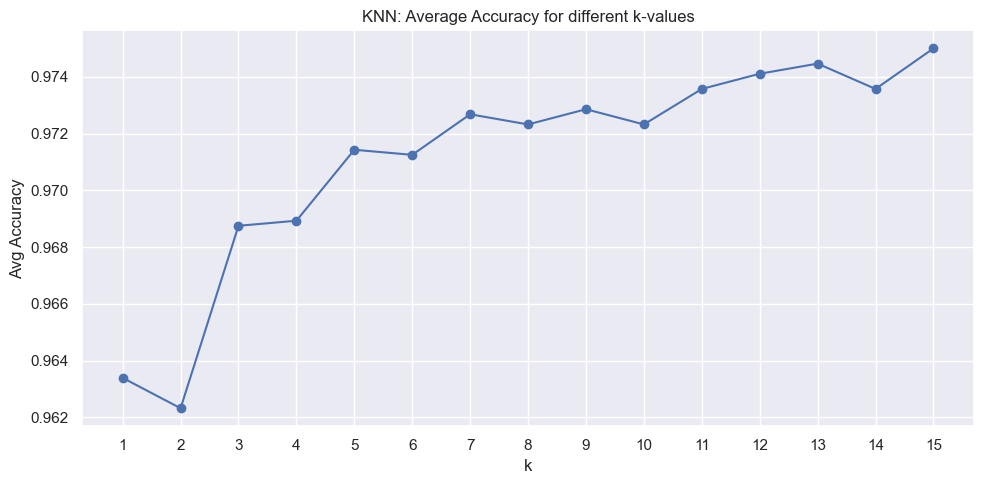

In [189]:
# Visualization
plt.figure(figsize=(10, 5))
plt.plot(knn_results_df["k"], knn_results_df["avg_accuracy"], marker="o")
plt.title("KNN: Average Accuracy for different k-values")
plt.xlabel("k")
plt.ylabel("Avg Accuracy")
plt.xticks(knn_results_df["k"])
plt.grid(True)
plt.tight_layout()
plt.show()

We've tested the accuracy from the KNN for different values of hyperparameter k, and for each k-value from 1 to 15 we've ran 10 different train test splits with different random_state-values. 

The results shows that the lowest k-values gives a weaker accuracy, with a jump at k=3. There is more or less a stabile accuracy at 11-13 k, a dip at 14, with the highest accuracy at 15 with an average accuracy of 97,5%. 

### Random Forest

In [190]:
# Test different trees
tree_values = [10, 50, 100, 200]
rf_results = []

for n in tree_values:
    accs = []
    
    # 10 different splits for each value of n_estimators
    for seed in range(10):
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=seed)

        # RF without scaler
        model = RandomForestClassifier(n_estimators=n, random_state=seed)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        acc = accuracy_score(y_val, y_pred)
        accs.append(acc)
    
    avg_acc = np.mean(accs)
    rf_results.append((n, avg_acc))

# Make dataframe 
rf_df = pd.DataFrame(rf_results, columns=["n_estimators", "Avg Accuracy"])
print("\nRandom Forest - Average Accuracy per number of trees:")
print(rf_df.sort_values(by="Avg Accuracy", ascending=False))


Random Forest - Average Accuracy per number of trees:
   n_estimators  Avg Accuracy
3           200      0.961250
2           100      0.960893
1            50      0.959464
0            10      0.948929


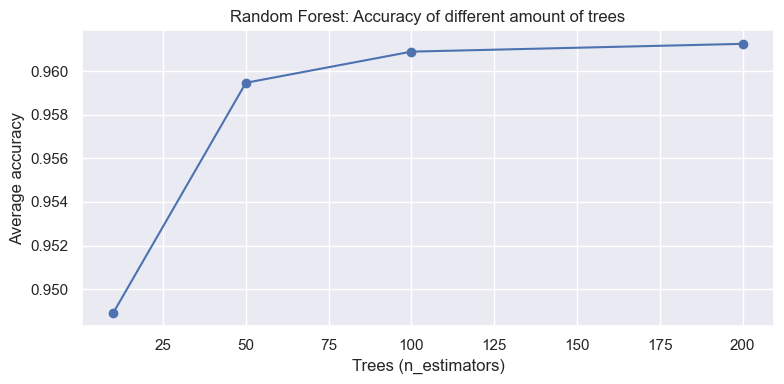

In [191]:
plt.figure(figsize=(8, 4))
plt.plot(rf_df["n_estimators"], rf_df["Avg Accuracy"], marker="o")
plt.title("Random Forest: Accuracy of different amount of trees")
plt.xlabel("Trees (n_estimators)")
plt.ylabel("Average accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()

We've evaluated Random Forest model with four different values of n_estimators, and produced the average accuracy of 10 different train test splits for each value. The results shows that the optimal value is n_estimators = 200, with an average accuracy of 0.96%, but 100 trees could also be effective. 

## Final Evaluation

The model with the highest average accuracy was to be SVC with C=10 at 0.978929 (97,89%). So we've chosen to test this in Kaggle, and use it as out final model. 

In [192]:
# Scale again
scaler_full = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [193]:
# Train the final model with SVC C = 10
final_model = SVC(kernel="rbf", C=10)
final_model.fit(X_scaled, y)

SVC(C=10)

In [194]:
# Use same features
X_test = df_test[["Size", "Weight", "Sweetness", "Softness", "HarvestTime", "Ripeness", "Acidity"]]

# Scale with same scaler
X_test_scaled = scaler.transform(X_test)

# Make predictions
final_preds = final_model.predict(X_test_scaled)

### Kaggle Sumbission

In [195]:
submission = pd.DataFrame({
    "ID": df_test.index,
    "Quality": final_preds
})
submission.to_csv("submssion.csv", index = False)